In [6]:
%run Jansen_And_Rit.py

<Figure size 640x480 with 0 Axes>

In [2]:
%run OptimiseFunctions.py

In [7]:
x1, x2, x3, V_T_sim = run_jansen_and_rit(10,10,94,101,35,10,0.367,1,0.66,0,0.5)
# x1, x2, x3, V_T_sim = run_jansen_and_rit(3.25,22,135,100,50,50,0.56,0.56,0.56,0,0)

In [11]:
find_bold_loss([10,10,94,101,35,10,0.367,1,0.66,0,0.5])

10 10 94 101 35 10 0.367 1 0.66 0 0.5
not cached


-0.35698618133135757

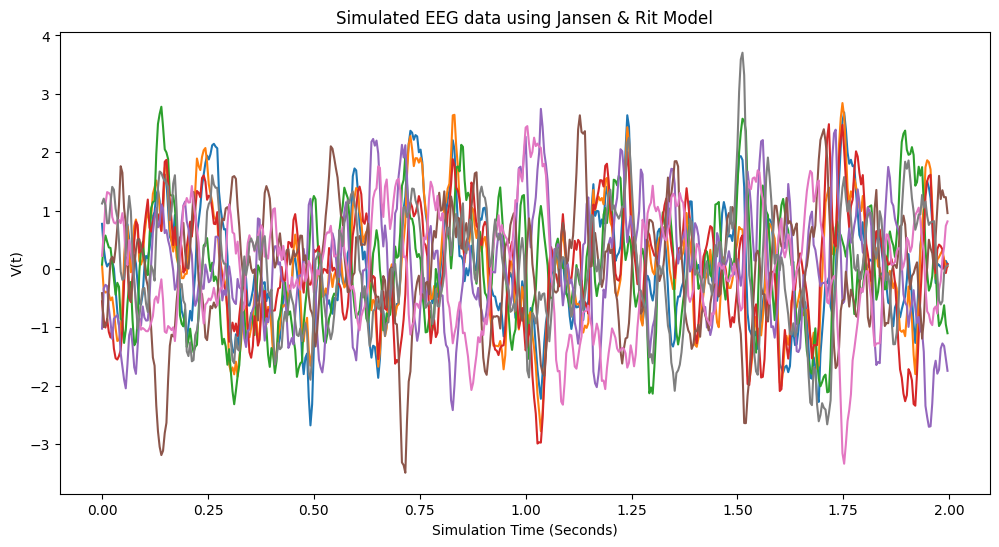

In [12]:
%matplotlib inline
# Plot EEG Results #################################################################
fig = plt.figure(figsize=(12, 6)) 

time_seconds = np.arange(V_T_sim.shape[0]) / eeg_freq

# Plot V_T for each node
# for node in range(62):
for node in [1, 4, 33, 10, 53, 41, 61, 14]:
    plt.plot(time_seconds, V_T_sim[:, node], label=f'Node {node+1}')

plt.xlabel('Simulation Time (Seconds)')
plt.ylabel('V(t)')
plt.title('Simulated EEG data using Jansen & Rit Model')

# Add legend to the right of the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.close(fig)

IndexError: index 62 is out of bounds for axis 1 with size 62

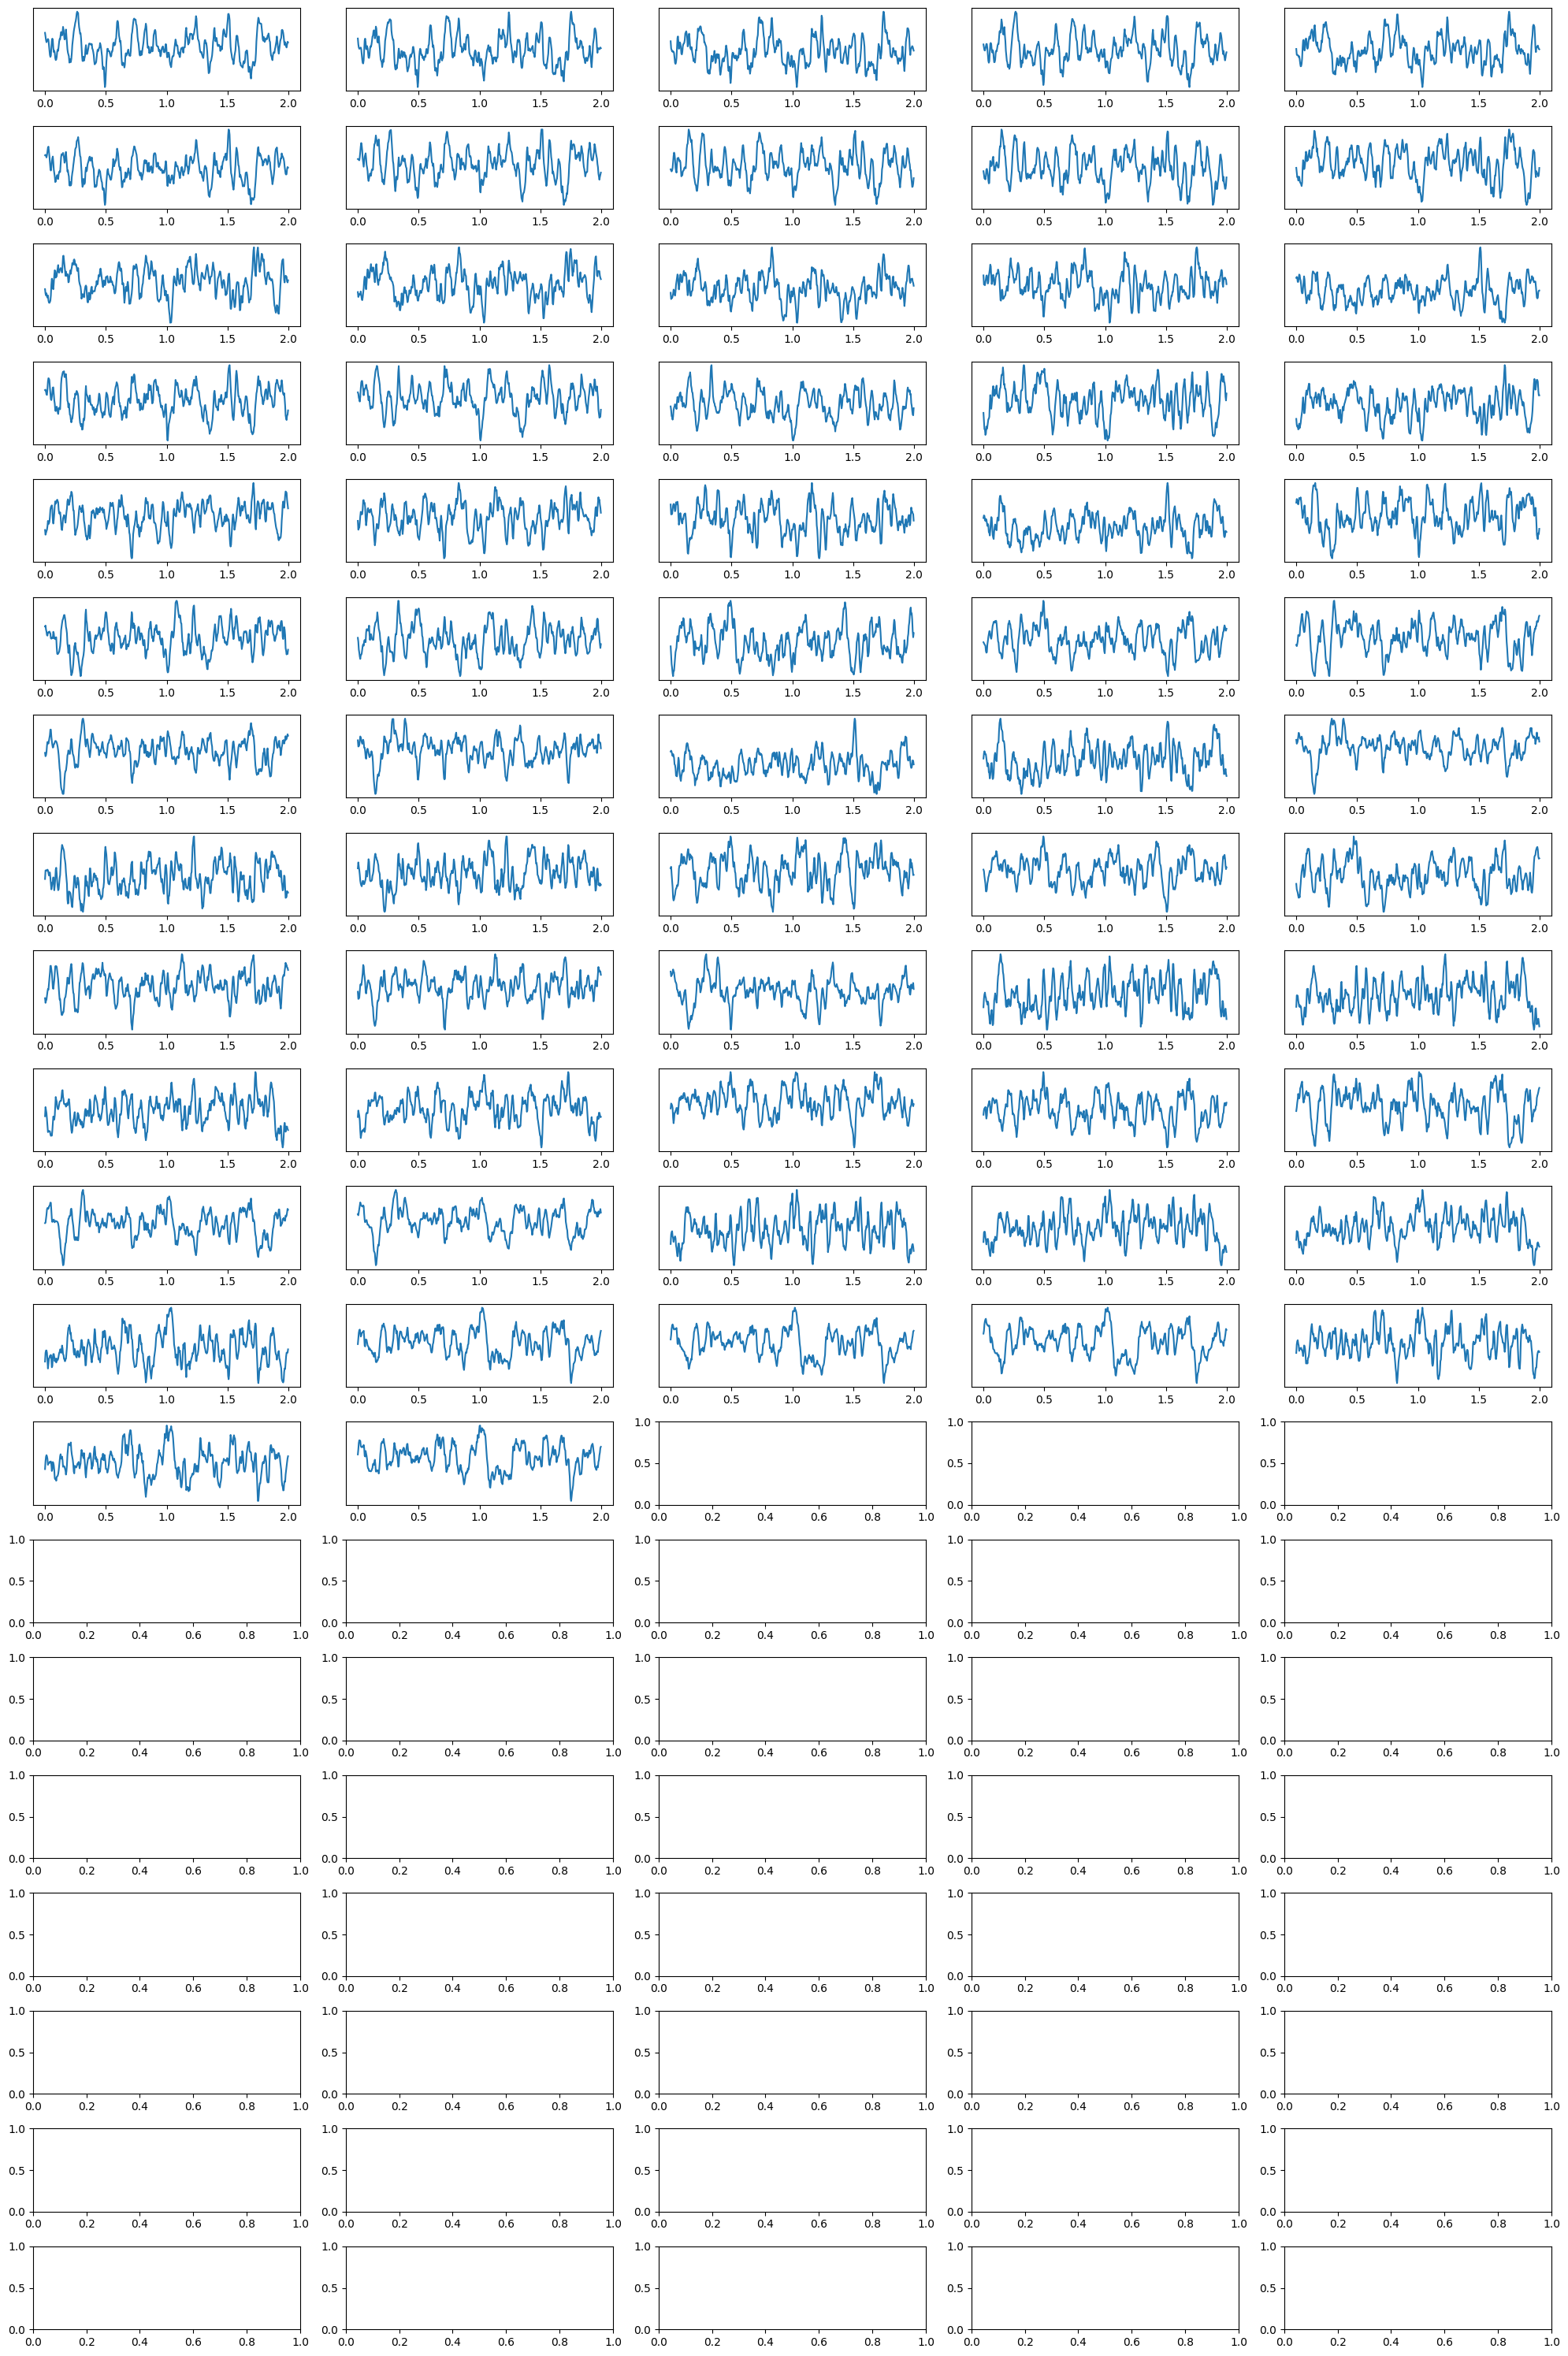

In [13]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(20, 30))

node = 0
for row in ax:
    for col in row:
        col.plot(time_seconds,  V_T_sim[:, node])
        col.tick_params(left=False, labelleft=False)
        node += 1 
    plt.tight_layout()

plt.show()
plt.close(fig)

In [5]:
ch_names = ['CH{}'.format(i) for i in range(62)]
# Create info dictionary

fake_info = mne.create_info(ch_names, sfreq=eeg_freq)
raw = mne.io.RawArray(data=V_T_sim.T, info=fake_info)

plt.switch_backend('QtAgg')

fig = raw.plot(scalings=10)

Creating RawArray with float64 data, n_channels=62, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Using matplotlib as 2D backend.


: 

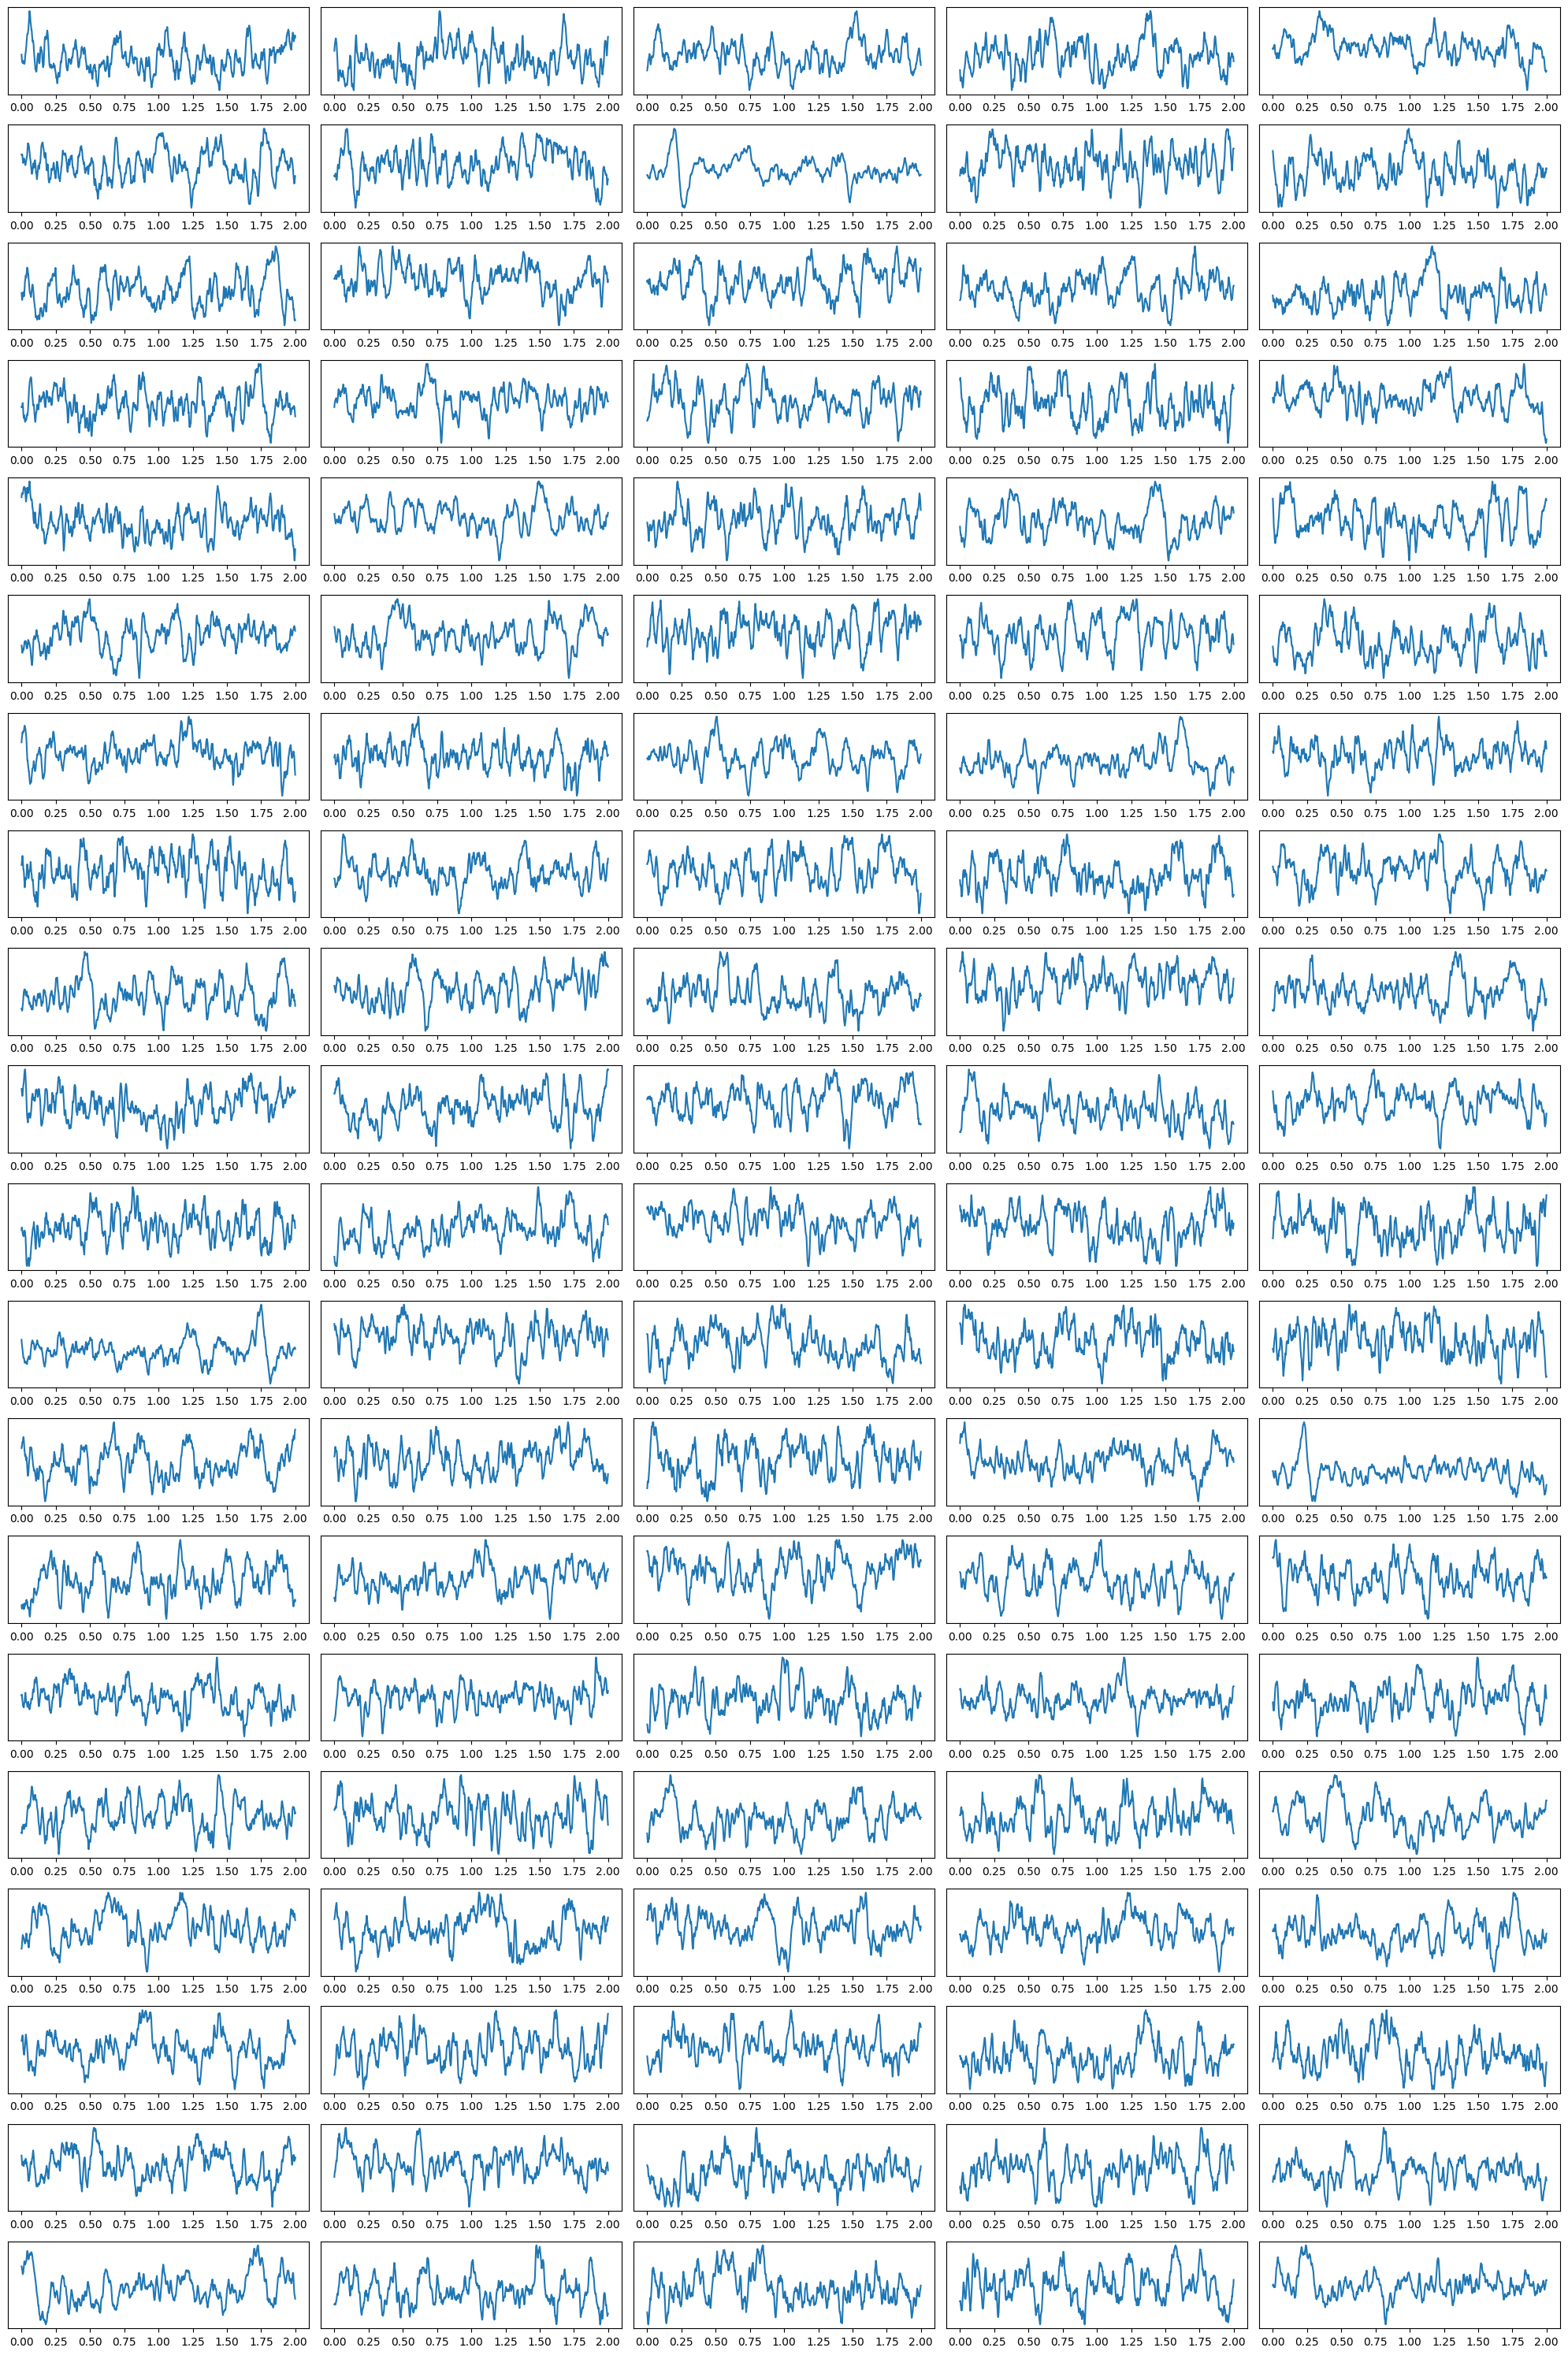

In [139]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(20, 30))

node = 0
for row in ax:
    for col in row:
        col.plot(time_seconds,  V_T_sim[:, node])
        col.tick_params(left=False, labelleft=False)
        node += 1 
    plt.tight_layout()

plt.show()
plt.close(fig)